In [56]:
#Importing the libraries
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Integration with trapezoidal rule

![integration](data/integral.png)

In [57]:
def definite_integral(a,b,f):

    n_points = 1000
    h = (b - a) / (n_points - 1)
    i = a
    
    vx = []
    vy = []
    
    while i <= b:
        x = i
        y = f_teste(x)
        vx.append(x)
        vy.append(y)
        i += h
    
    soma = 0
    
    for i in range(len(vx) - 1):
        soma += ((vy[i] + vy[i+1]) * h)/2
        
    return soma

In [58]:
def f_teste(x):
    return math.pow(math.sin(x), 2)

In [59]:
print(definite_integral(0, math.pi * 2, f_teste))


3.14159252919343


## Euler-Cromer method

In the Euler method, $v_{t+1}$ is calculated based on previous values of $v_{t}$ and $x_{t}$. Then, $x_{t+1}$ is calculated based on previous values of $v_{t}$ and $x_{t}$.

In the Euler-Cromer method, $v_{t+1}$ is calculated based on previous values of $v_{t}$ and $x_{t}$, but $x_{t+1}$ is calculated based on present values of $v_{t+1}$ and $x_{t}$.

In [60]:
def EulerCromer(t0, tf, dt, x0, v0, F, m,  k, b, n_trans):
    t = np.arange(t0, tf+dt, dt)
    n = len(t)
    x, v = np.zeros(n), np.zeros(n)
    x[0] = x0
    v[0] = v0
    
    for i in range(n_trans+1, n):
        v[i] = v[i - 1] + dt*F(x[i - 1], v[i - 1], t[i - 1], k, m, b)/m
        x[i] = x[i-1] + dt*v[i]
        
    return x,v, t

In [61]:
#spring–mass system
def F(x, v, t, k, m, b):
    return (-k*x -b*v)

Text(0.5, 1.0, 'x vs v')

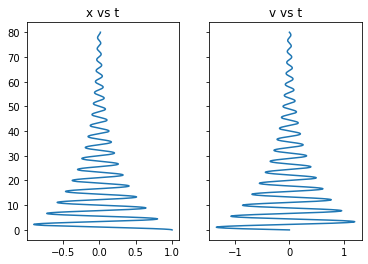

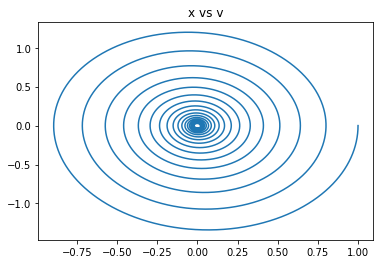

In [62]:
x, v, t = EulerCromer(0.0, 80.0, 0.001, 1.0, 0.0, F, 1.0, 2.0, 0.1, 0)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, t)
ax1.set_title('x vs t')
ax2.plot(v, t)
ax2.set_title('v vs t')

plt.figure()
plt.plot(x, v)
plt.title("x vs v")